# Graphs in ML - Project Notebook
###### Valentin Berkes, Simon Lebastard

In this notebook we will create several strongly and weakly connected graphs, test the Exp3G algorithm and assess the influence of a qualitative change in the connectivity graph on the evolution of regret.

In [1]:
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import write_dot
from EXP3 import EXP3, compute_regret, plot_regret, gaussian_filter
import arms
import numpy as np
import obsGraph

In [2]:
G = nx.DiGraph()
G.add_node(0, arm=arms.ArmBernoulli(0.5))
G.add_node(1, arm=arms.ArmBernoulli(0.3))
G.add_node(2, arm=arms.ArmBernoulli(0.4))
G.add_node(3, arm=arms.ArmBernoulli(0.7))
G.add_edge(0,0)
G.add_edge(0,1)
G.add_edge(2,2)
G.add_edge(3,3)

G = nx.convert_node_labels_to_integers(G)

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

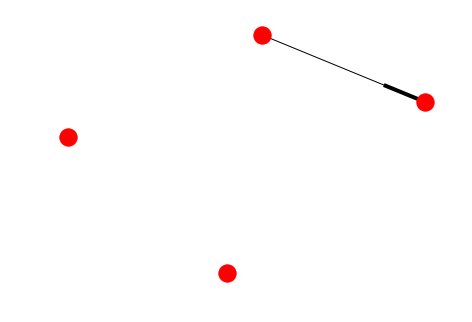

In [3]:
import matplotlib.pyplot as plt
nx.draw(G)  # networkx draw()
plt.draw()
plt.show()

In [4]:
## Get nice graphs with self-loops in PNG format
# 1) Install pygraphviz
# 2) Run:
write_dot(G,'graph.dot')
# 3) In terminal, run: dot -Tpng graph.dot > graph.png

We will run the Exp3G algorithm 50 times and produce an average to have a smooth regret function. This will allow us to detect quasi-linear components and better identify the asymptotic regret. Note that quasi-linear components can be used on a transformed regret:
- $x \mapsto \sqrt{x}$ would allow us to find the areas where the regret behaves as $\mathcal{O}(\sqrt{x})$
- $x \mapsto x^{\frac{2}{3}}$ would allow us to find the areas where the regret behaves as $\mathcal{O}(x^{\frac{2}{3}})$

In [5]:
n_itr = 5000
n_sim = 50

q,losses = EXP3(G, list(G.nodes()), 0.5, 0.05, n_itr, n_sim)

Simulating EXP3: 100%|██████████| 5000/5000 [00:00<00:00, 28910.64it/s]


In [6]:
regret = compute_regret(losses, G)

Fitting power functions is still experimental, but it will allow us to track changes in regret trends when it fully works

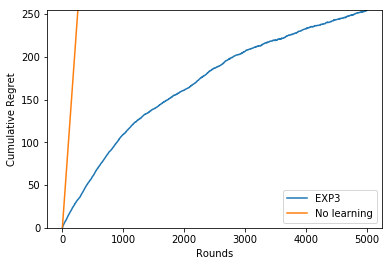

In [7]:
# der2,linAreas = plot_regret([regret], ['EXP3'], reg="Pwr2/3", stdev=19)
der2,linAreas = plot_regret([regret], ['EXP3'])

Second derivative can be plotted to figure out the thresholds to use for fitting linear and power curves

In [9]:
#plt.plot(range(10,4700), der2[10:4700])
#plt.show()

## Building strongly connected graphs

To generate a class of strongly connected graphs, we use a parametric method that proceeds as follows:
- A fully connected graph $\mathcal{G}$ is created
- $\alpha \in [0,1]$ specifies the rate of self-edges to be removed from $\mathcal{G}$
- $\beta \in [0,1]$ parametrises the rate of peer-edges to be removed, according to the following policy: if we decide to remove peer-edges for a node $i$ then there is a uniform probability distribution over the number of peer-edges to remove.

Even though this method does allow to generate only a given class of graphs, we can later generalize it by introducing a third parameter $p$ that would be the probability distribution to replace the uniform distribution in the case where peer-edges are removed.

Here is an example of a strongly connected graph created through our function:

In [10]:
alpha1 = 0.5
beta1 = 0.5
n_nodes = 5
H1 = obsGraph.strong_obs_graph(n_nodes, alpha1, beta1)

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

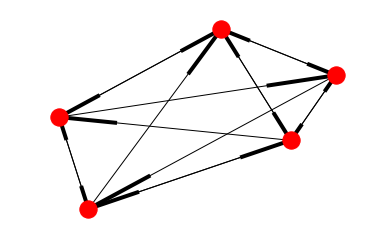

In [11]:
nx.draw(H1)  # networkx draw()
plt.draw()
plt.show()
write_dot(H1,'strong1.dot')

In [12]:
obsGraph.observability_type(H1)

2

In [13]:
obsGraph.strong_nodes(H1)

{'dual': [], 'peer': [4], 'self': [0, 1, 2, 3]}

Note that in this case, we chose $\alpha + \beta = 1$, resulting in edges removed for all nodes (either self-edge, or one or more peer-edges).

In the second example below, some edges are left dual:

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

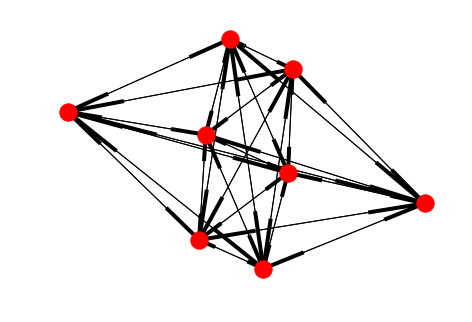

{'dual': [4, 6], 'peer': [0, 1, 2, 3, 5, 7], 'self': []}

In [14]:
alpha2 = 0.4
beta2 = 0.3
n_nodes = 8
H2 = obsGraph.strong_obs_graph(n_nodes, alpha2, beta2)
nx.draw(H2)  # networkx draw()
plt.draw()
plt.show()
write_dot(H2,'strong2.dot')
obsGraph.observability_type(H2)
obsGraph.strong_nodes(H2)

# Examples
## Strongly observable
### Bandit

In [15]:
bandit = nx.DiGraph()
bandit.add_node(0, arm=arms.ArmBernoulli(0.5))
bandit.add_node(1, arm=arms.ArmBernoulli(0.3))
bandit.add_node(2, arm=arms.ArmBernoulli(0.4))
bandit.add_node(3, arm=arms.ArmBernoulli(0.7))
bandit.add_node(4, arm=arms.ArmBernoulli(0.1))
bandit.add_edge(0,0)
bandit.add_edge(1,1)
bandit.add_edge(2,2)
bandit.add_edge(3,3)
bandit.add_edge(4,4)
print(obsGraph.observability_type(bandit))

2


/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

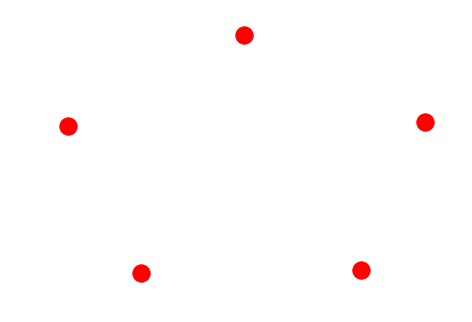

In [16]:
nx.draw(bandit)  # networkx draw()
plt.draw()
plt.show()

In [18]:
n_itr = 10000
n_sim = 10
bandit_q, bandit_losses = EXP3(bandit, list(bandit.nodes()), 0.5, 0.05, n_itr, n_sim)
bandit_regret = compute_regret(bandit_losses, bandit)

Simulating EXP3: 100%|██████████| 10000/10000 [00:00<00:00, 29466.38it/s]


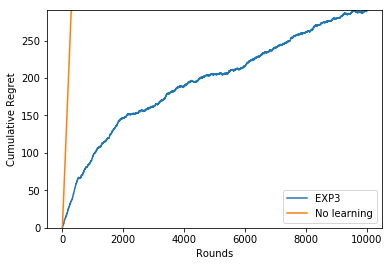

([], [])

In [19]:
plot_regret([bandit_regret], ['EXP3'])

In [20]:
bandit_q

array([  2.42767751e-279,   1.89634400e-285,   4.63060904e-296,
         1.00000000e+000,   0.00000000e+000])

independent set np hard
https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.approximation.html?highlight=independent%20set#module-networkx.algorithms.approximation.independent_set

how to compute weak domination number?

regret doit être une esperance: il faut lancer plusieurs fois et faire la moyenne

### Full feedback

In [21]:
graph_arms = [arms.ArmBernoulli(0.5), arms.ArmBernoulli(0.3), arms.ArmBernoulli(0.4), arms.ArmBernoulli(0.7), arms.ArmBernoulli(0.1)]
full_feedback = obsGraph.strong_obs_graph(5, 0, 0, graph_arms)
print(obsGraph.observability_type(full_feedback))

2


/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

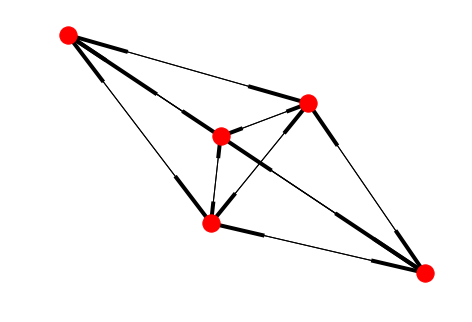

In [22]:
nx.draw(full_feedback)  # networkx draw()
plt.draw()
plt.show()

In [24]:
n_itr = 10000
n_sim = 10
full_feedback_q, full_feedback_losses = EXP3(full_feedback, list(full_feedback.nodes()), 0.5, 0.05, n_itr, n_sim)
full_feedback_regret = compute_regret(full_feedback_losses, full_feedback)

Simulating EXP3: 100%|██████████| 10000/10000 [00:00<00:00, 14758.12it/s]


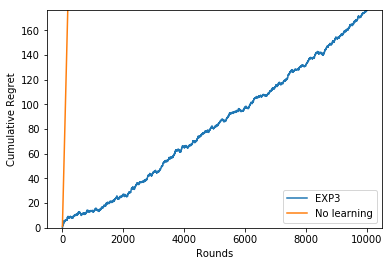

([], [])

In [25]:
plot_regret([full_feedback_regret], ['EXP3'])

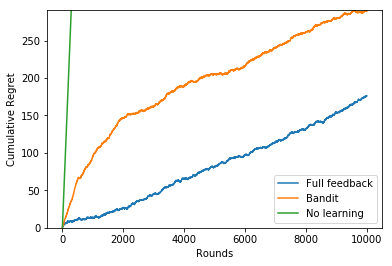

([], [])

In [26]:
plot_regret([full_feedback_regret, bandit_regret], ['Full feedback', 'Bandit'])

### Police officer - loopless clique

In [27]:
graph_arms = [arms.ArmBernoulli(0.5), arms.ArmBernoulli(0.3), arms.ArmBernoulli(0.4), arms.ArmBernoulli(0.7), arms.ArmBernoulli(0.1)]
police = obsGraph.strong_obs_graph(5, 1, 0, graph_arms)
print(obsGraph.observability_type(police))

2


/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

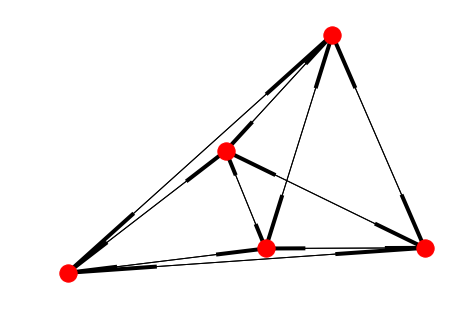

In [28]:
nx.draw(police)  # networkx draw()
plt.draw()
plt.show()

In [30]:
n_itr = 10000
n_sim= 10
police_q, police_losses = EXP3(police, list(police.nodes()), 0.5, 0.05, n_itr, n_sim)
police_regret = compute_regret(police_losses, police)

Simulating EXP3: 100%|██████████| 10000/10000 [00:00<00:00, 16486.25it/s]


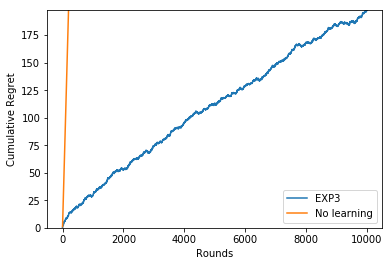

([], [])

In [31]:
plot_regret([police_regret], ['EXP3'])

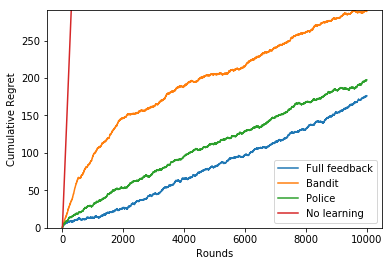

([], [])

In [32]:
plot_regret([full_feedback_regret, bandit_regret, police_regret], ['Full feedback', 'Bandit', 'Police'])

## Weakly observable

### Revealing actions

In [33]:
revealing = nx.DiGraph()
revealing.add_node(0, arm=arms.ArmBernoulli(0.5))
revealing.add_node(1, arm=arms.ArmBernoulli(0.3))
revealing.add_node(2, arm=arms.ArmBernoulli(0.4))
revealing.add_node(3, arm=arms.ArmBernoulli(0.7))
revealing.add_node(4, arm=arms.ArmBernoulli(0.1))
revealing.add_edge(0,0)
revealing.add_edge(0,1)
revealing.add_edge(0,2)
revealing.add_edge(0,3)
revealing.add_edge(0,4)
print(obsGraph.observability_type(revealing))

TypeError: 'list' object is not an iterator

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

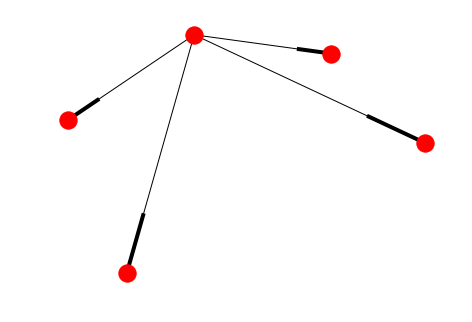

In [34]:
nx.draw(revealing)  # networkx draw()
plt.draw()
plt.show()

In [35]:
n_itr = 10000
n_sim = 10
revealing_q, revealing_losses = EXP3(revealing, list(revealing.nodes()), 0.5, 0.05, n_itr, n_sim)
revealing_regret = compute_regret(revealing_losses, revealing)

Simulating EXP3: 100%|██████████| 10000/10000 [00:00<00:00, 35295.43it/s]


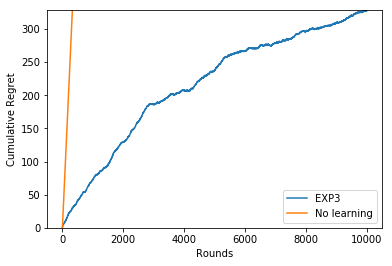

([], [])

In [36]:
plot_regret([revealing_regret], ['EXP3'])

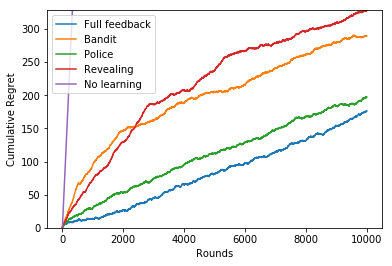

([], [])

In [37]:
plot_regret([full_feedback_regret, bandit_regret, police_regret, revealing_regret], ['Full feedback', 'Bandit', 'Police','Revealing'])

## Unobservable

# Instability

## Strongly to weakly

Here we will build a strongly connected graph, run Exp3G on this graph but break the strong connectivity while the algorithm runs.
Let's start simple with 5 nodes. The graph will only contain peer-edges

In [38]:
alpha1 = 1
beta1 = 0
n_nodes = 5
S1 = obsGraph.strong_obs_graph(n_nodes, alpha1, beta1)

In [39]:
perturbations = {1000:[[0,1]], 2000:[[0,2],[1,2]]}
n_itr = 5000
n_sim = 50

qS1,lS1 = EXP3(S1, list(S1.nodes()), 0.5, 0.05, n_itr, n_sim, perturbations)
regS1 = compute_regret(losses, G)
dr2S1,laS1 = plot_regret([regS1], ['EXP3, perturbed'])

Simulating EXP3:   0%|          | 0/5000 [00:00<?, ?it/s]

Edge [0, 1] removed at iteration 1000


TypeError: 'list' object is not an iterator

## Strongly to unobservable

In [11]:
# Should transition toweakly observable at 1000th iteration, then to unobservable at 2000th iteration
perturbations = {1000:[[0,1]], 2000:[[0,2],[0,3],[0,4]]}

## Weakly to unobservable